## Los Angeles Crime Trends in Coronavirus Pandemic
This dataset is pulled from open data that the city of Los Angeles provides. This is part of a larger analysis I am doing on the coronavirus. The current dataset simply counts up the amount of crime in a given day and outputs in a graph.

Data: https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('Arrest Data.csv')

In [41]:
# Date is converted to datetime
df['Date'] = df['Arrest Date']
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y')

In [42]:
df.set_index('Date', inplace=True)
df.sort_index(ascending=False, inplace=True)

In [43]:
# New column is created 'count', for counting up the # of occurrences.
df['count'] = df['Arrest Date'].groupby(df['Arrest Date']).transform('count')

In [44]:
df2 = df

In [45]:
# Filter to year 2020
df2 = df2[df2.index.year >= 2020]

In [46]:
# Removes duplicates
df2 = df2.loc[~df2.index.duplicated(keep='first')]

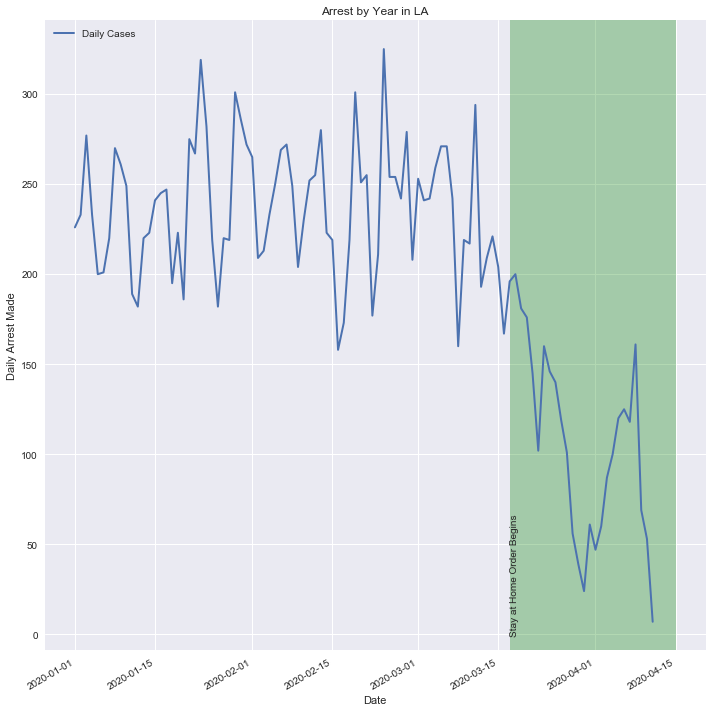

In [47]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add lines
ax.plot(df2.index.values,
         df2['count'], linewidth=2, label='Daily Cases')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Arrest Made",
       title="Arrest by Year in LA")

ax.text(a,0,'Stay at Home Order Begins',rotation=90)

ax.legend()

fig.autofmt_xdate()

plt.tight_layout()

a = '2020-03-17'
b = '2020-04-15'
plt.axvspan(a, b, color='g', alpha=0.3, lw=0)

plt.savefig('LA Virus 2020.png')

plt.show()